**`Dataset`**

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

**`Description of Variables`**

The dataset contains 6366 observations of 9 variables:

- `rate_marriage` : woman's rating of her marriage (1 = very poor, 5 = very good)

- `age` : woman's age

- `yrs_married` : number of years married

- `children` : number of children

- `religious` : woman's rating of how religious she is (1 = not religious, 4 =strongly religious)

- `educ` : level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school,20 = advanced degree)

- `occupation` : woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

- `occupation_husb` : husband's occupation (same coding as above)

- `affairs` : time spent in extra-marital affairs

In [1]:
# Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
# Loading data.
dataset = sm.datasets.fair.load_pandas().data

In [3]:
# Adding new feature as *affair* in dataset with values as 0 (not having affair) and 1 (having affair).
dataset["affair"] = (dataset.affairs > 0).astype(int)

In [4]:
# Top 5 records of the dataset.
dataset.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
# Check for datatype of all feature.
dataset.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
affair               int32
dtype: object

In [6]:
# Check for Missing Value.
dataset.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

- No Missing Values.

In [7]:
# Check for Shape of the dataset
dataset.shape

(6366, 10)

In [8]:
# Check for duplicate values.
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6361    False
6362    False
6363     True
6364    False
6365    False
Length: 6366, dtype: bool

In [9]:
# Dropping duplicate values.
dataset.drop_duplicates(inplace=True)

In [10]:
# Check for Shape of the dataset
dataset.shape

(5327, 10)

<Axes: >

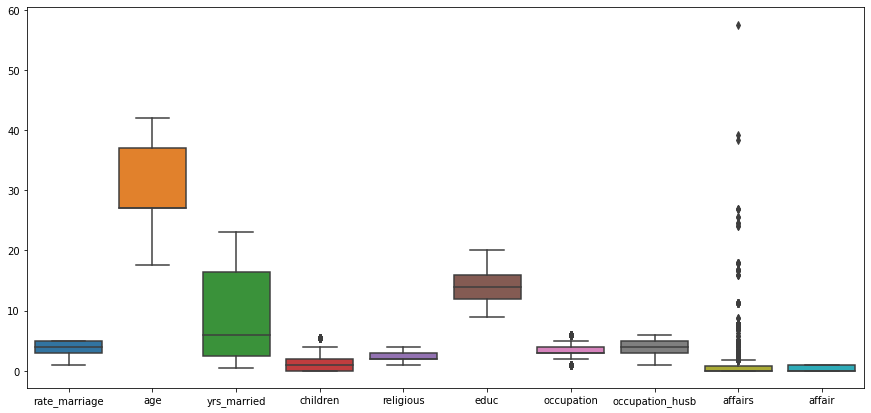

In [11]:
# Check for outliers
plt.figure(figsize=(15,7))
sns.boxplot(dataset)

- Their are outliers in **children**, **occupation**, and **affairs** features.

In [12]:
dataset.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,5327.000000,5327.000000,5327.000000,5327.000000,5327.000000,5327.000000,5327.000000,5327.000000,5327.000000,5327.000000
mean,4.028534,29.806458,9.758776,1.542425,2.418810,14.241036,3.453163,3.853013,0.835222,0.379576
std,0.994131,6.839909,7.288906,1.443413,0.899434,2.238355,0.980476,1.367499,2.383441,0.485327
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,27.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,37.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.727273,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


<Axes: >

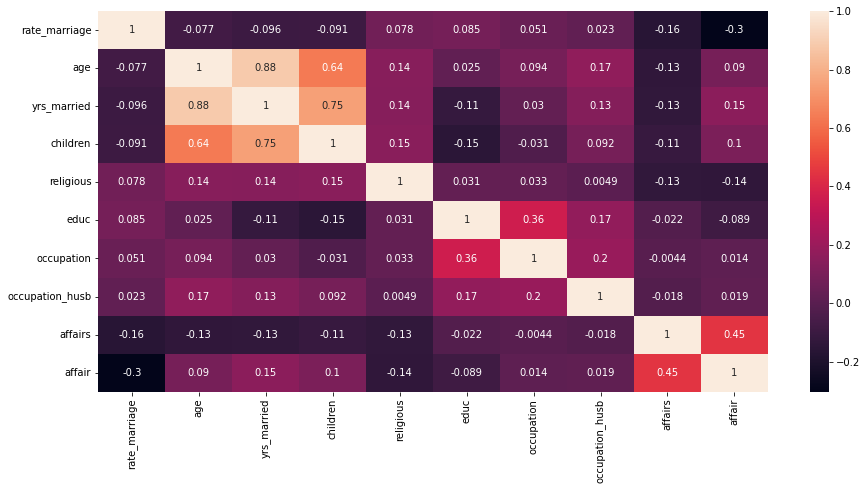

In [13]:
# Check for correlation.
plt.figure(figsize=(15,7))
sns.heatmap(dataset.corr(),annot=True)

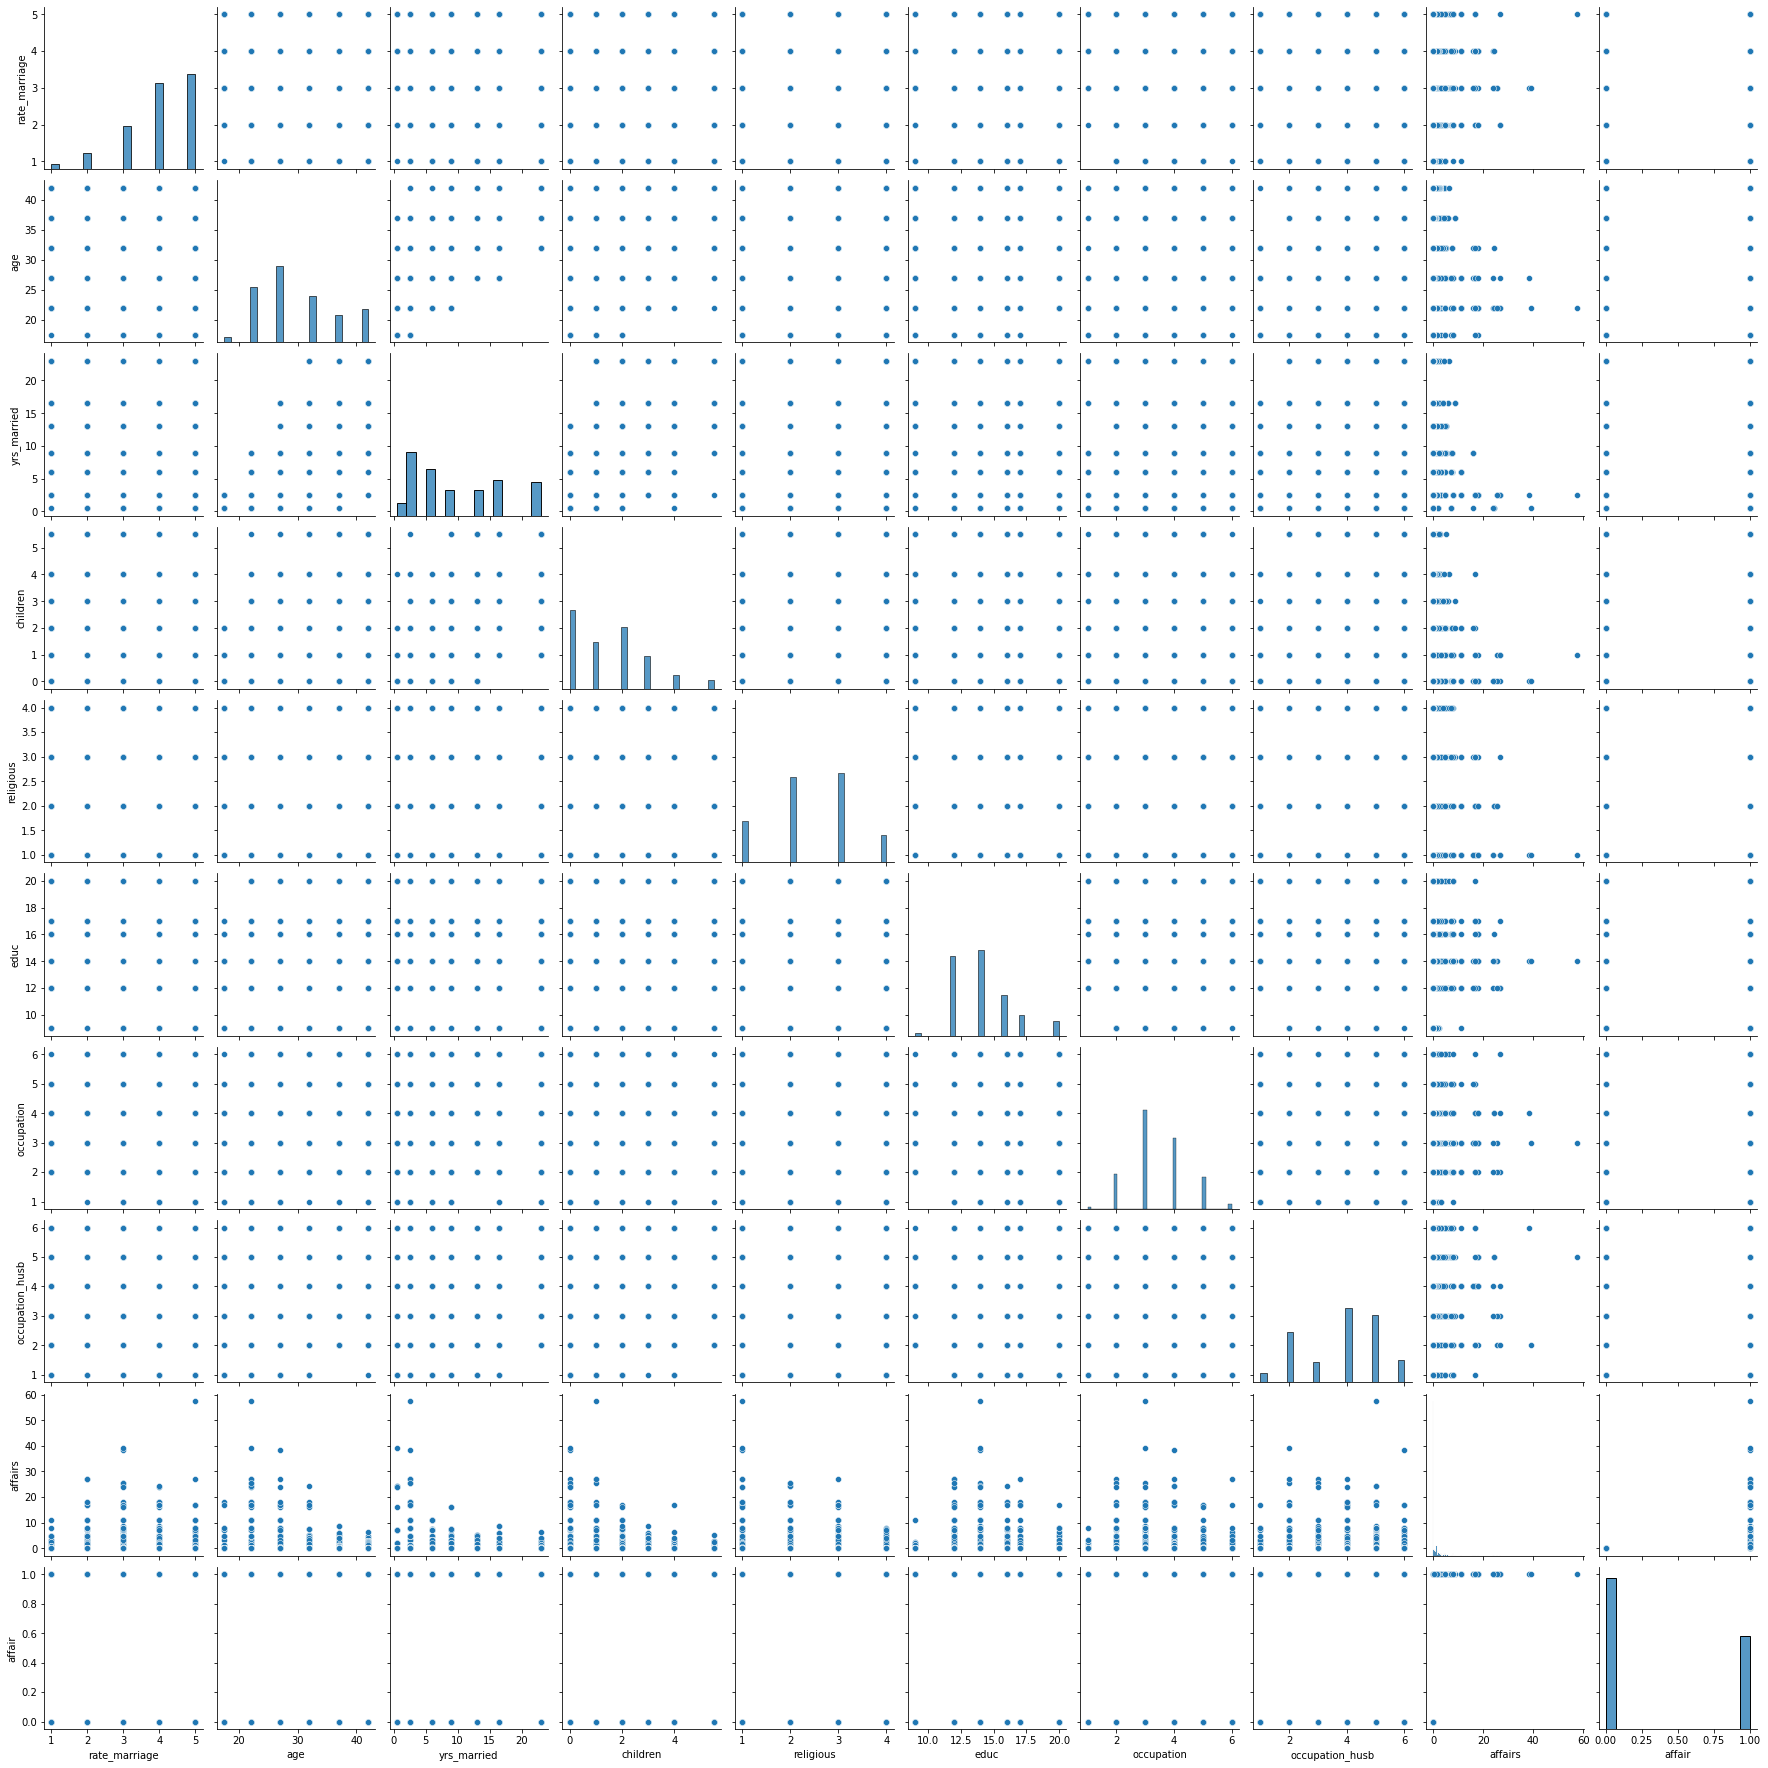

In [14]:
sns.pairplot(dataset)

<Axes: xlabel='affair', ylabel='count'>

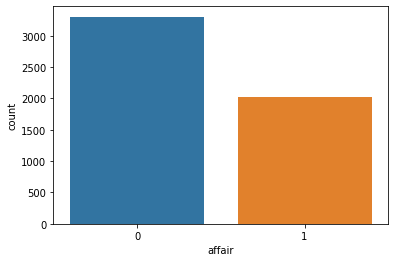

In [15]:
# Target feature analysis.
sns.countplot(x=dataset["affair"])

- Data is not Highly Imbalanced.

In [16]:
# Splitting dataset into Independent and Dependent feature.
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)',
dataset, return_type="dataframe")

In [17]:
# Top 2 records of Independent feature.
X.head(2)

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0


In [18]:
# Top 2 records of Dependent feature.
y.head(2)

,affair
0,1.0
1,1.0


In [19]:
# Renaming columns name for better understanding. 
X = X.rename(columns = {
'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6' })
y = np.ravel(y)

In [20]:
# Top 2 records of Independent feature.
X.head(2)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0


In [21]:
X['Intercept'].unique()

array([1.])

In [22]:
# Dropping column which is not required.
X.drop(columns='Intercept',inplace=True)

In [23]:
# Top 2 records of Independent feature.
X.head(2)

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0


In [24]:
# Splitting data into test test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.30)

In [25]:
X_train.shape

(3728, 16)

In [26]:
y_train.shape

(3728,)

In [27]:
X_test.shape

(1599, 16)

In [28]:
y_test.shape

(1599,)

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
logistic.score(X_train,y_train)

0.6893776824034334

In [31]:
y_pred = logistic.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.6772983114446529

In [33]:
confusion_matrix(y_test,y_pred)

array([[840, 131],
       [385, 243]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.87      0.77       971
         1.0       0.65      0.39      0.49       628

    accuracy                           0.68      1599
   macro avg       0.67      0.63      0.63      1599
weighted avg       0.67      0.68      0.66      1599



In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Logistic Regression using Grid Search CV
from sklearn.model_selection import GridSearchCV
parameter = {'penalty' : ['l1', 'l2', 'elasticnet', None],'C':[0.98,0.99,0.97,0.96,0.95,0.94],
'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],'max_iter':[100,200,300]}

In [37]:
logistic_cv = GridSearchCV(logistic,parameter,cv=5,scoring="accuracy")

In [38]:
logistic_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.98, 0.99, 0.97, 0.96, 0.95, 0.94],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [39]:
logistic_cv.best_params_

{'C': 0.98, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}

In [40]:
logistic_cv.best_score_

0.6896475160588013

In [41]:
y_pred = logistic_cv.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred)

0.6772983114446529

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.87      0.77       971
         1.0       0.65      0.38      0.48       628

    accuracy                           0.68      1599
   macro avg       0.67      0.63      0.62      1599
weighted avg       0.67      0.68      0.65      1599



#### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
random_forest.score(X_train,y_train)

0.9487660944206009

In [46]:
y_pred = random_forest.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred)

0.6278924327704816

In [48]:
confusion_matrix(y_test,y_pred)

array([[726, 245],
       [350, 278]], dtype=int64)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71       971
         1.0       0.53      0.44      0.48       628

    accuracy                           0.63      1599
   macro avg       0.60      0.60      0.60      1599
weighted avg       0.62      0.63      0.62      1599



In [50]:
parameter = {'n_estimators' : [10,50,100,150],'criterion':["gini", "entropy", "log_loss"],'max_depth':[5,10,15,20]}

In [51]:
random_forest_cv = GridSearchCV(random_forest,parameter,cv=5,scoring="accuracy")

In [52]:
random_forest_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20],
                         'n_estimators': [10, 50, 100, 150]},
             scoring='accuracy')

In [53]:
random_forest_cv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

In [54]:
random_forest_cv.best_score_

0.6794494125267647

In [55]:
y_pred = random_forest_cv.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.6566604127579737

In [57]:
import pickle
pickle.dump(logistic,open('logistic.pkl','wb'))

In [58]:
model = pickle.load(open('logistic.pkl','rb'))

In [59]:
model.predict(X_test)

array([1., 0., 0., ..., 0., 0., 1.])

In [60]:
x = [[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0]]
model.predict(x)[0]

0.0

In [61]:
x = [[0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0]]
model.predict(x)[0]

1.0

In [62]:
dataset['religious'].unique()

array([3., 1., 2., 4.])